In [1]:
from tensorflow import keras
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
digit = keras.datasets.mnist.load_data()
# digit is a tuple containing ((x_train, y_train), (x_test, y_test))

In [3]:
(X_train, y_train), (X_test, y_test) = digit

In [4]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [5]:
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [6]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949],
       dtype=int64))

In [7]:
np.unique(y_test, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([ 980, 1135, 1032, 1010,  982,  892,  958, 1028,  974, 1009],
       dtype=int64))

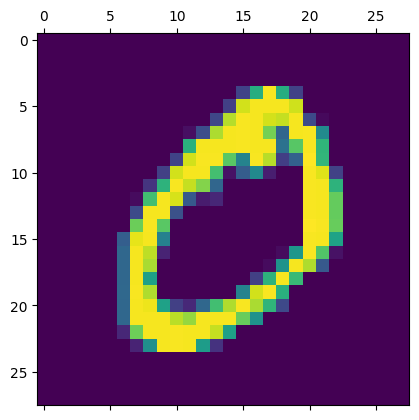

In [8]:
plt.matshow(X_train[1])

### Data Manipulation

In [9]:
# Scale
X_train = X_train / 255
X_test = X_test / 255

# Optimizer = 'adam'

In [10]:
model = keras.Sequential([
    keras.layers.Input(shape=(28, 28)),  # input_layer = 784
    keras.layers.Flatten(),
    keras.layers.Dense(100, activation='relu'),  # hidden_layer_1 = 100
    keras.layers.Dense(10, activation='softmax')  # output_layer = 10
])

model.compile(
    optimizer='adam',
    loss="sparse_categorical_crossentropy",
    metrics=['accuracy']
)

tb_callback_1 = keras.callbacks.TensorBoard(log_dir='logs/adam', histogram_freq=1)  
# log_dir : Directory where the logs will be saved

model.fit(X_train, y_train, epochs=3, callbacks=[tb_callback_1])

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8702 - loss: 0.4601
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9620 - loss: 0.1329
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9755 - loss: 0.0850


# Optimizer = 'SGD'

In [11]:
model2 = keras.Sequential([
    keras.layers.Input(shape=(28, 28)),  # input_layer = 784
    keras.layers.Flatten(),
    keras.layers.Dense(100, activation='relu'),  # hidden_layer_1 = 100
    keras.layers.Dense(10, activation='softmax')  # output_layer = 10
])

model2.compile(
    optimizer='SGD',
    loss="sparse_categorical_crossentropy",
    metrics=['accuracy']
)

tb_callback_2 = keras.callbacks.TensorBoard(log_dir='logs/SGD', histogram_freq=1)  
# log_dir : Directory where the logs will be saved

model2.fit(X_train, y_train, epochs=3, callbacks=[tb_callback_2])

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7089 - loss: 1.0903
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9005 - loss: 0.3589
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9113 - loss: 0.3088


# TensorBoard

In [14]:
%load_ext tensorboard
%tensorboard --logdir logs --port 1002

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
